### Data Mining Project

Diabetes, is a group of metabolic disorders in which there are high blood sugar levels over a prolonged period. Symptoms of high blood sugar include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, and damage to the eyes.

This dataset has several medical predictor(Independent variables and dependent variables which is the target variables (diabetes)). The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes.

Building Prediction Models for Type 2 Diabetes Using Machine Learning Techniques and different models using the dataset below

Details/Variables about the Dataset:

  1. Diabetes_012
	2. HighBP
	3. HighChol
	4. CholCheck
	5. BMI
	6. Smoker
	7. Stroke
	8. HeartDiseaseorAttack
	9. PhysActivity
	10. Fruits
	11. Veggies
	12. HvyAlcoholConsump
	13. AnyHealthcare
	14. NoDocbcCost
	15. GenHlth
	16. MentHlth
	17. PhysHlth
	18. DiffWalk
	19. Sex
	20. Age
	21. Education
	22. Income


#### Loading and Importing Relevant Libraries

In [62]:
# import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn import linear_model, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [63]:
# file names and urls
# filepath_2015 = "/kaggle/input/diabetes-health-indicators-dataset\
# /diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
# filepath_2021 = "/kaggle/input/d/julnazz/diabetes-health-indicators-dataset\
# /diabetes_binary_5050split_health_indicators_BRFSS2021.csv"




In [64]:
# diab1 = pd.read_csv('diabetes_012_health_indicators.csv')
diab2 = pd.read_csv('diabetes_binaryhealth.csv')

In [65]:
diab2.Diabetes_binary.unique()

array([0., 1.])

In [66]:
# Combine the two DataFrames
# diabetes = pd.concat([diab1, diab2], axis=0).reset_index(drop=True)

# Rename the 'Diabetes_binary' column to 'Diabetes'
diab2.rename(columns={"Diabetes_binary": "Diabetes"}, inplace=True)

# Display the first few rows of the combined dataframe
# and its shape to verify the combination
combined_df_info = diab2.head(), diab2.shape

combined_df_info

(   Diabetes  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
 0       0.0     1.0       1.0        1.0  40.0     1.0     0.0   
 1       0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2       0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3       0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4       0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
 0                   0.0           0.0     0.0  ...            1.0   
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
 1          1.

In [67]:
  diab2.Diabetes.isnull().sum()

0

In [68]:
# Print the total number of missing values
print("There are {} missing values in this dataset".format(diab2.isnull().sum().sum()))

print('Number of rows = %d' % (diab2.shape[0]))
print('Number of columns = %d' % (diab2.shape[1]))

print('Number of missing values:')
for col in diab2.columns:
    print('\t%s: %d' % (col,diab2[col].isna().sum()))

There are 0 missing values in this dataset
Number of rows = 253680
Number of columns = 22
Number of missing values:
	Diabetes: 0
	HighBP: 0
	HighChol: 0
	CholCheck: 0
	BMI: 0
	Smoker: 0
	Stroke: 0
	HeartDiseaseorAttack: 0
	PhysActivity: 0
	Fruits: 0
	Veggies: 0
	HvyAlcoholConsump: 0
	AnyHealthcare: 0
	NoDocbcCost: 0
	GenHlth: 0
	MentHlth: 0
	PhysHlth: 0
	DiffWalk: 0
	Sex: 0
	Age: 0
	Education: 0
	Income: 0


In [69]:
# Describe the Dataset
diab2.describe()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [70]:
# Checking Datatypes of the Dataset
diab2.dtypes

Diabetes                float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

All our variables have the data type float

In [71]:
diab2.columns


Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#### Removing the less Relevance Feauture

In [72]:
# Remove irrelevant features from the combined dataset
columns_to_remove = ["CholCheck", "AnyHealthcare", "NoDocbcCost", "Education", "Income"]
diab = diab2.drop(columns=columns_to_remove)

# Reverse the values of 'GenHlth'
diab["GenHlth"] = 6 - diab["GenHlth"]

# Display the first few rows of the reduced dataframe to verify the removal
diab.head()

,Diabetes,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,3.0,0.0,0.0,0.0,11.0


#### Exploratory Data Analysis

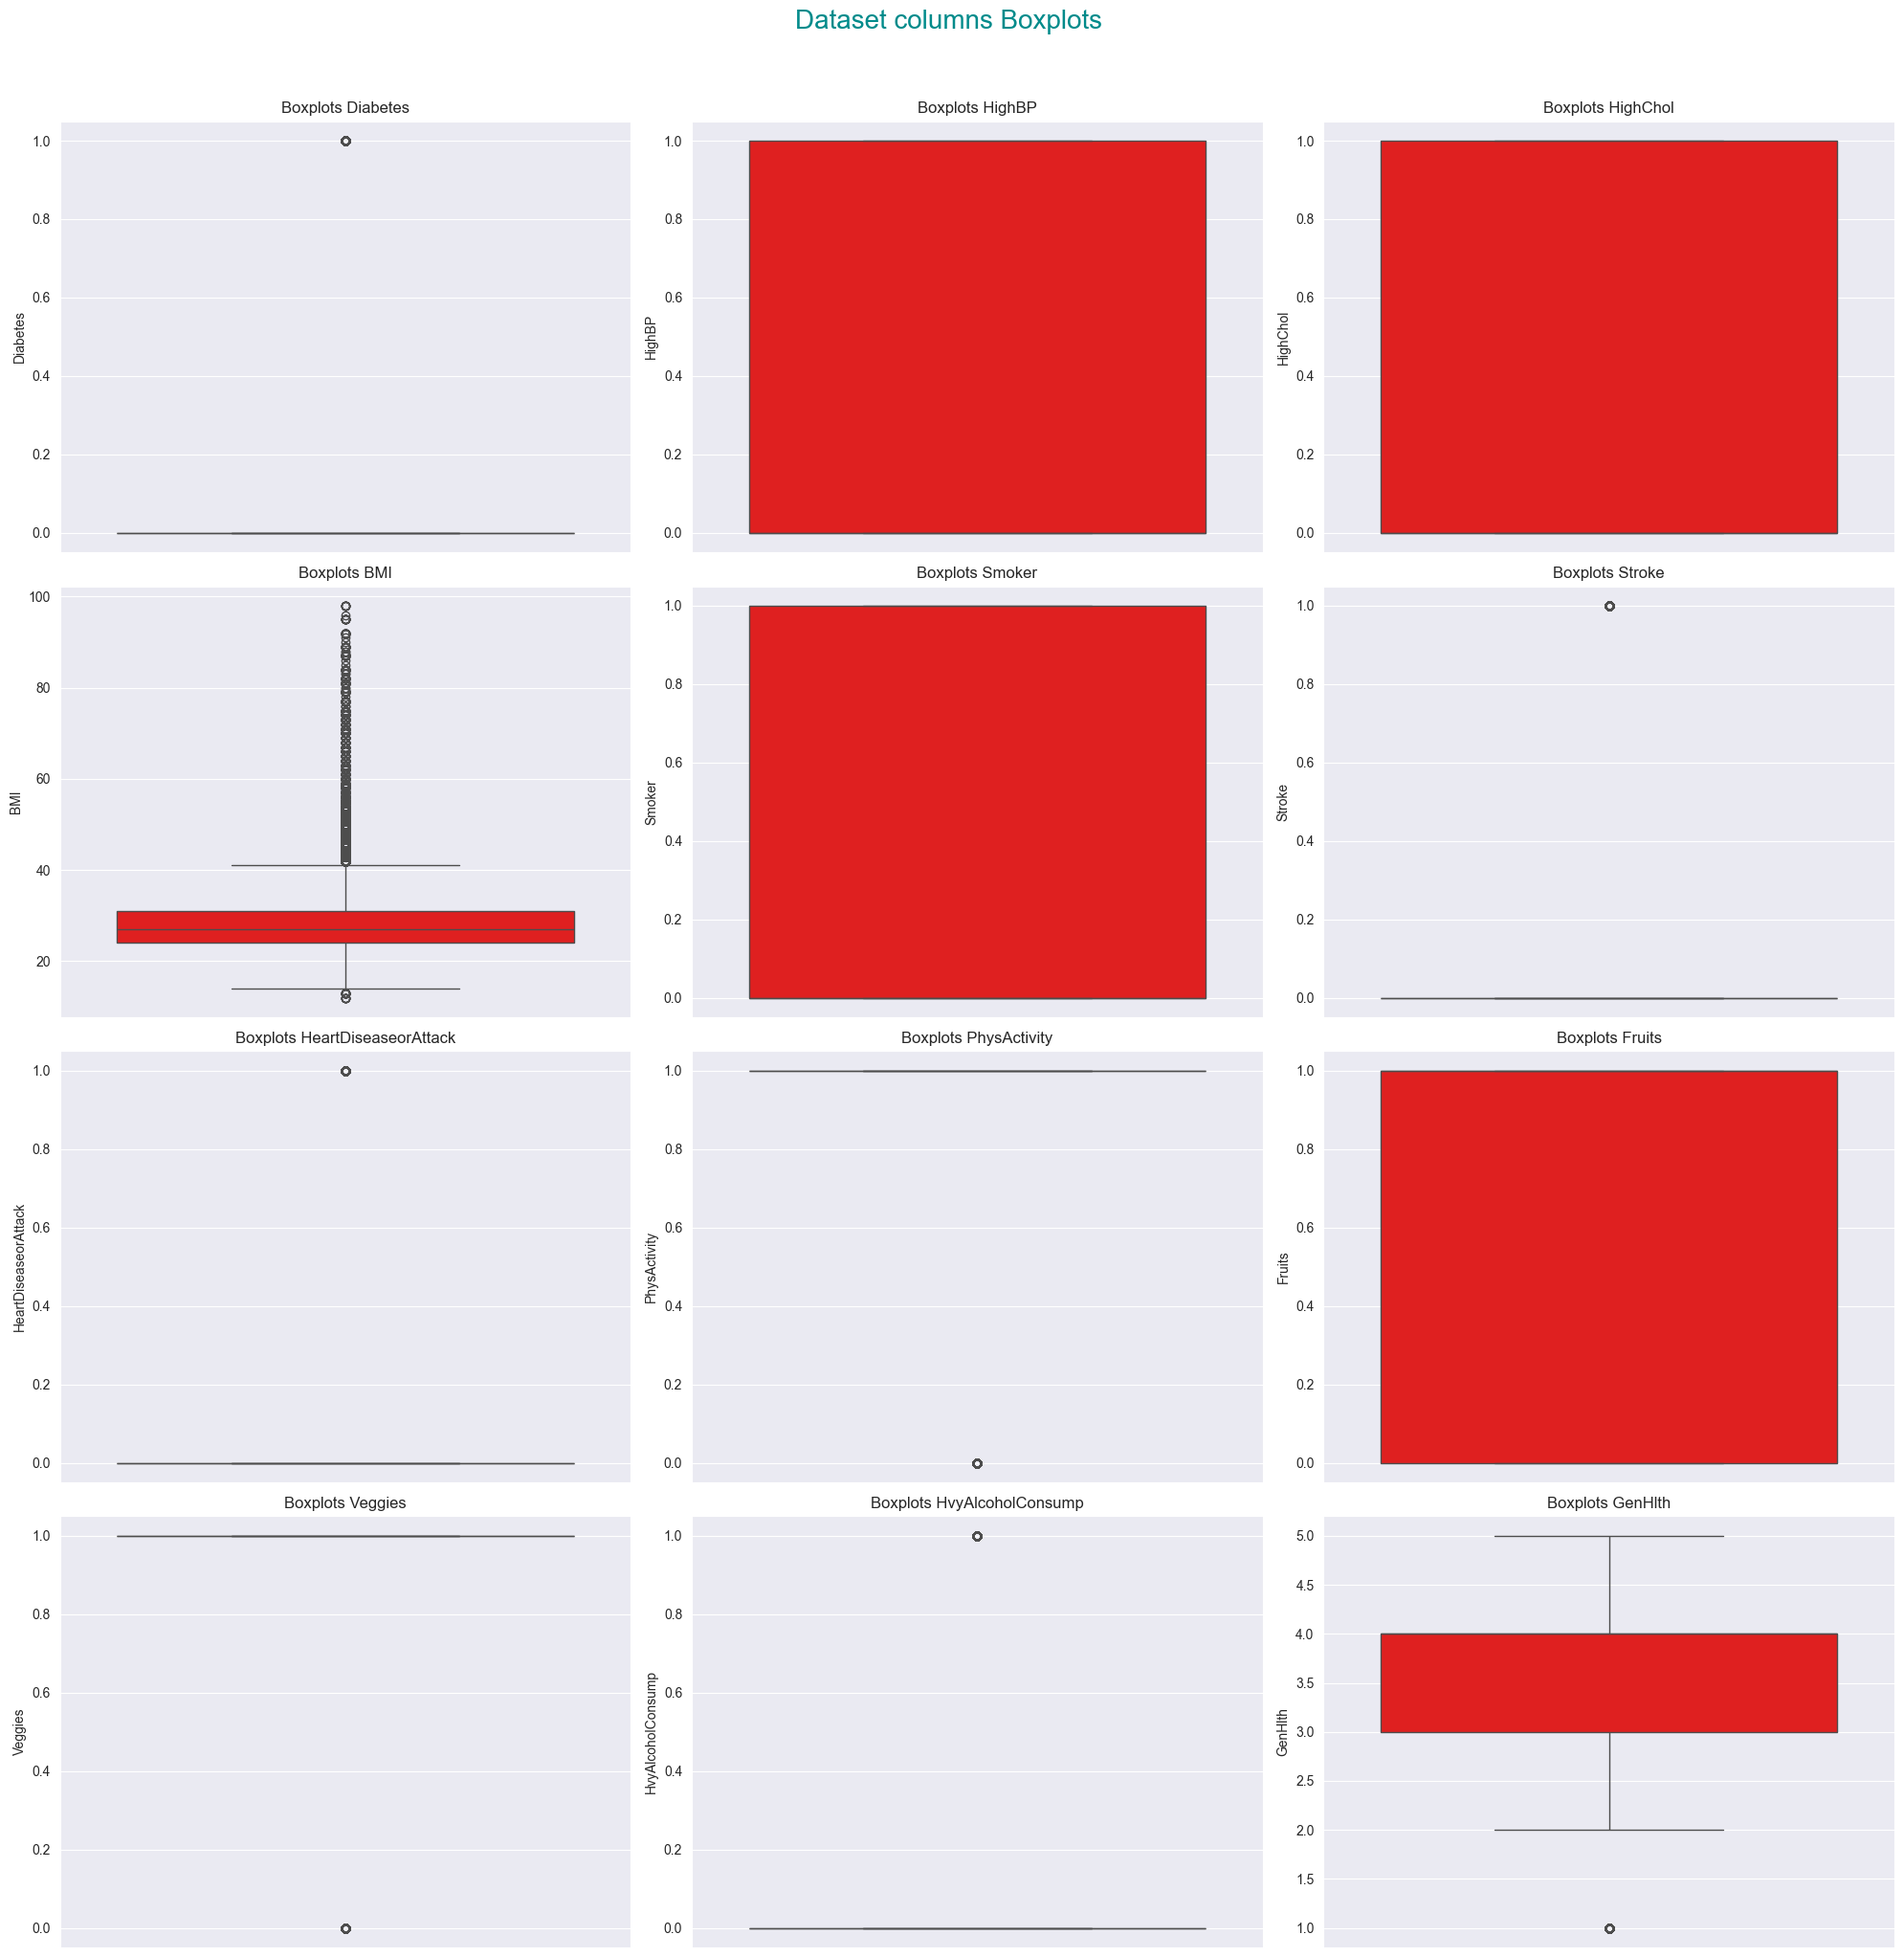

In [73]:
# Checking for Outliers


fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20,20))

fig.suptitle('Dataset columns Boxplots ', y = 1.02, color = 'darkcyan', fontsize = 20)

for ax, data, name in zip(axes.flatten(), diab, diab.columns):
  sns.boxplot(diab[name], ax = ax, color = 'Red')
  ax.set_title('Boxplots ' + name)
#   ax.set_facecolor(blue)
plt.tight_layout()

Upon checkin on the graphs generated above there are some variables with outliers

In [74]:
# Checking for Anomalies
#
Q1 = diab.quantile(0.25)
Q3 = diab.quantile(0.75)

IQR = Q3 - Q1

diabetes = diab[~((diab < (Q1 - 1.5 * IQR)) | (diab > (Q3 + 1.5 * IQR))).any(axis = 1)]
diabetes.shape

## Removing the outliers using the IQR where you subtract Q3 - Q1

(97727, 17)

The IQR reduced a lot of the dataset and decided to just work with original dataset

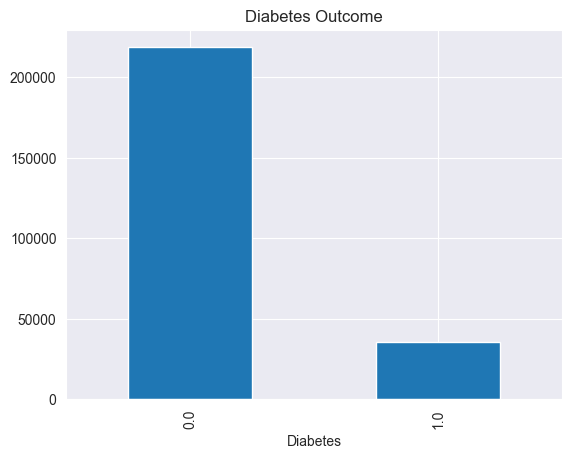

In [75]:
# Exploring the outcome of diabetes, showing either Type 1

diab.groupby('Diabetes')['Diabetes'].count().plot(kind = 'bar')
plt.title('Diabetes Outcome')
plt.show()

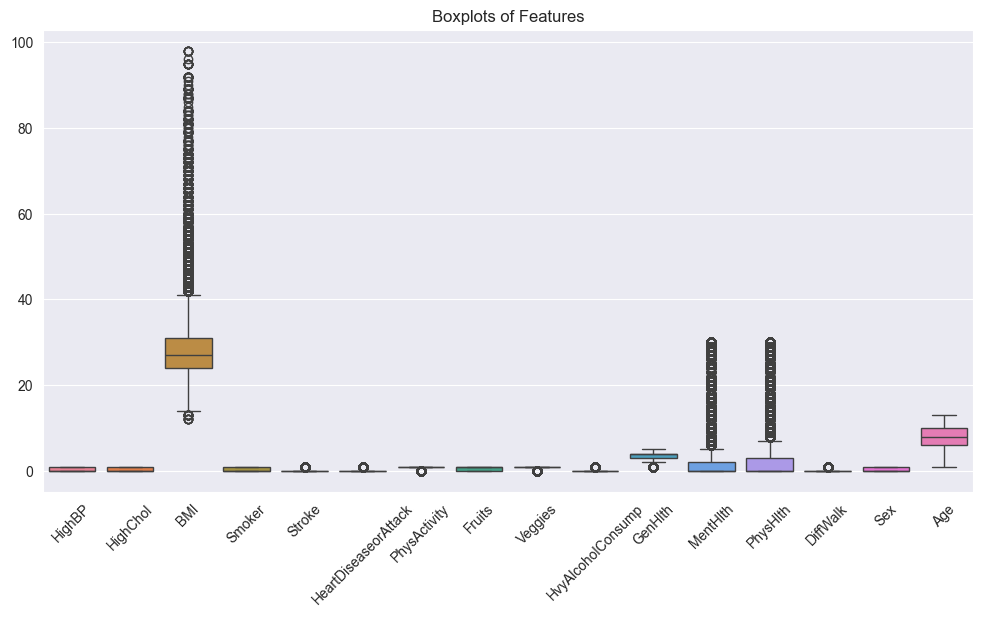

In [76]:
# Boxplots

plt.figure(figsize=(12, 6))
sns.boxplot(data=diab.drop(columns='Diabetes'))
plt.title('Boxplots of Features')
plt.xticks(rotation=45)
plt.show()

Indicates that variables BMI,MentHlth,PhysHlth strongly correlate to the target variable

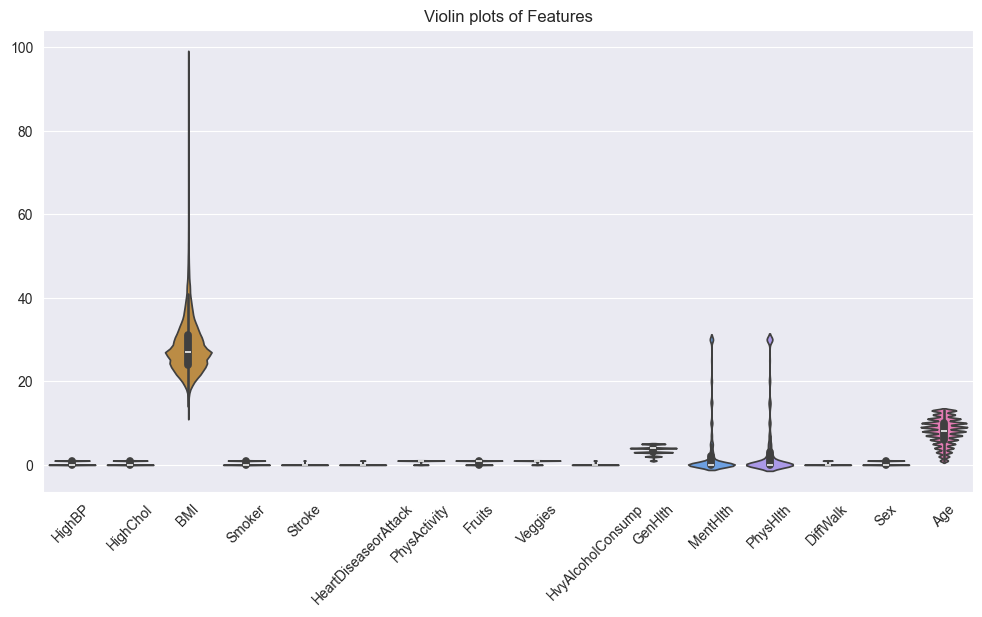

In [77]:
# Violin plots

plt.figure(figsize=(12, 6))
sns.violinplot(data=diab.drop(columns='Diabetes'))
plt.title('Violin plots of Features')
plt.xticks(rotation=45)
plt.show()

Indicates that variables BMI,MentHlth,PhysHlth strongly correlate to the target variable, still shows the strong relationship the three have with the target variables

#### Data Type Optimization Analysis


Here we perform a preliminary analysis aimed at optimizing data storage and processing efficiency by examining the range of values for selected features within the reduced dataset. Here we see that all numerical values are well within the range of an 8-bit integer (this dataset has no numbers with decimal values).

We also calculate the memory used before we adjust the data types-- this is our baseline for memory usage.

In [78]:
# Check range of values of specified features to determine suitable data types
features_to_optimize = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]
data_types_optimization = (
    diab[features_to_optimize].describe().loc[["min", "max"]]
)

# Memory used before reducing data types
memory_before = diab.memory_usage(index=True).sum()

data_types_optimization

,BMI,GenHlth,MentHlth,PhysHlth,Age
min,12.0,1.0,0.0,0.0,1.0
max,98.0,5.0,30.0,30.0,13.0


#### Data Type Conversion for Efficiency


We enhance the dataset's memory efficiency by converting specified binary columns to boolean data types. We print the memory usage before and after the operation to demonstrate the effectiveness of this optimization in reducing the dataset's memory consumption.

In [79]:
# scale data types down to reduce memory footprint
diab["BMI"] = diab["BMI"].astype("float32")
diab["GenHlth"] = diab["GenHlth"].astype("int8")
diab["MentHlth"] = diab["MentHlth"].astype("int8")
diab["PhysHlth"] = diab["PhysHlth"].astype("int8")
diab["Age"] = diab["Age"].astype("int8")

# convert 1/0 binary columns to boolean values
binary_columns = [
    "Diabetes",
    "HighBP",
    "HighChol",
    "Smoker",
    "Stroke",
    "HeartDiseaseorAttack",
    "PhysActivity",
    "Fruits",
    "Veggies",
    "HvyAlcoholConsump",
    "DiffWalk",
    "Sex",
]
for column in binary_columns:
    diab[column] = diab[column].astype("bool")

# memory size after data type reduction
memory_after = diab.memory_usage(index=True).sum()

print("Dataframe memory used before:", memory_before)
print("Dataframe memory used after:  ", memory_after)

Dataframe memory used before: 34500612
Dataframe memory used after:   5073732


### Logistic Regression Model for Diabetes Prediction


Here we prepare data for machine learning, specifically using a logistic regression model to predict diabetes. First, numerical columns are identified and scaled using MinMaxScaler to ensure all features contribute equally to the model without bias from varying scales. A logistic regression model is then initialized with specific parameters. The dataset is split into features (X_log) and the target variable (y_log). The data is further divided into training and test sets to evaluate the model's performance on unseen data.

After training the logistic regression model, predictions are made on the test set. The model's effectiveness is assessed using accuracy, confusion matrix, and classification report, providing a comprehensive overview of its predictive capabilities in distinguishing between diabetic and non-diabetic individuals.

In [80]:
from imblearn.combine import SMOTEENN
# copy Dataframe for Logistic model
log_df = diab.copy(deep=True)

# Selecting numerical columns (excluding binary/boolean columns)
numerical_columns = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
log_df[numerical_columns] = scaler.fit_transform(log_df[numerical_columns])

mylog_model = linear_model.LogisticRegression(solver="saga", max_iter=1000)

# 'X' is the feature set and 'y' is the target variable
X_log = log_df.drop("Diabetes", axis=1)
y_log = log_df["Diabetes"].astype("bool")  # Ensuring the target is boolean

smt = SMOTEENN()

X_log, y_log = smt.fit_resample(X_log, y_log)

# Splitting the dataset into the Training set and Test set
X_log_train, X_log_test, y_log_train, y_log_test = model_selection.train_test_split(
    X_log, y_log, test_size=0.25, random_state=42
)

# Train the model and output prediction of test data
mylog_model.fit(X_log_train, y_log_train)
y_pred_log = mylog_model.predict(X_log_test)

# Evaluate the model
accuracy_log = accuracy_score(y_log_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_log_test, y_pred_log)
class_report_log = classification_report(y_log_test, y_pred_log)

print("\nLogistic Regression (single) prediction results:", "\n")
print(f"Accuracy: {round(accuracy_log*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_log, "\n")
print("Classification Report:")
print(class_report_log)


Logistic Regression (single) prediction results: 

Accuracy: 86.05 % 

Confusion Matrix:
[[31301  5553]
 [ 5052 34100]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.85      0.86     36854
        True       0.86      0.87      0.87     39152

    accuracy                           0.86     76006
   macro avg       0.86      0.86      0.86     76006
weighted avg       0.86      0.86      0.86     76006



### Building Decision Tree Model

In [81]:
## Load Libraries for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
??DecisionTreeClassifier()

Object `DecisionTreeClassifier()` not found.


In [82]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_log_train, y_log_train)

# Predict based on the model we've trained
y_pred_tree = tree.predict(X_log_test)


# Evaluate the model
accuracy_tree = accuracy_score(y_log_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_log_test, y_pred_tree)
class_report_tree = classification_report(y_log_test, y_pred_tree)

print("\nDecision Tree Classifier prediction results:", "\n")
print(f"Accuracy: {round(accuracy_tree*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_tree, "\n")
print("Classification Report:")
print(class_report_tree)


Decision Tree Classifier prediction results: 

Accuracy: 93.97 % 

Confusion Matrix:
[[34553  2301]
 [ 2282 36870]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     36854
        True       0.94      0.94      0.94     39152

    accuracy                           0.94     76006
   macro avg       0.94      0.94      0.94     76006
weighted avg       0.94      0.94      0.94     76006



### Feature Importance


Performed Feature importance to get the variables that are more relevant to help us in the hyper parameter tuning to improve performance of the models prediction and Accuracy

Feature ranking:
1. Feature 'GenHlth' (0.3975289692531168)
2. Feature 'BMI' (0.20042574638224364)
3. Feature 'Age' (0.11953881339553828)
4. Feature 'HighBP' (0.11815022717364236)
5. Feature 'PhysHlth' (0.03582003648844632)
6. Feature 'MentHlth' (0.026101125962561356)
7. Feature 'HighChol' (0.018386371771387664)
8. Feature 'Sex' (0.012941529297939585)
9. Feature 'Fruits' (0.012104305671351017)
10. Feature 'Smoker' (0.011372656537706027)
11. Feature 'PhysActivity' (0.011153899836861434)
12. Feature 'Veggies' (0.009659887304154206)
13. Feature 'DiffWalk' (0.009313502637076882)
14. Feature 'HeartDiseaseorAttack' (0.008545622903214388)
15. Feature 'HvyAlcoholConsump' (0.004676096993927649)
16. Feature 'Stroke' (0.004281208390832272)


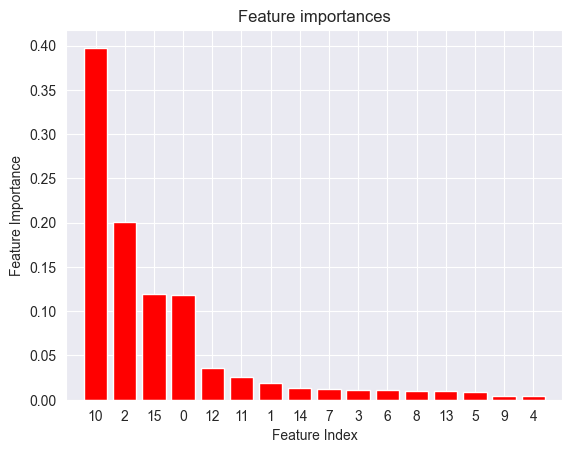

In [83]:
# Get feature importances
importances = tree.feature_importances_

# Get feature names
feature_names = X_log_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_log_train.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}' ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_log_train.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X_log_train.shape[1]), indices)
plt.xlim([-1, X_log_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()

Ater getting the feature importance as observed in the graph above there were some variables that were more important than other we decided to move forward with some variables.

### Tuning the Model

In [84]:
# Drop the least important features
X_modified = X_log.drop(columns=['Stroke', 'HvyAlcoholConsump', 'HeartDiseaseorAttack'])



In [85]:
# Split the modified data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_modified, y_log, test_size=0.3, random_state=42)

# Train a new decision tree classifier
model_modified = DecisionTreeClassifier()
model_modified.fit(X_train, y_train)

# Evaluate performance on the test set
y_pred_modified = model_modified.predict(X_test)

# Evaluate the model
accuracy_modified = accuracy_score(y_test, y_pred_modified)
conf_matrix_modified = confusion_matrix(y_test, y_pred_modified)
class_report_modified = classification_report(y_test, y_pred_modified)

print("\nDecision Tree Classifier Modified prediction results:", "\n")
print(f"Accuracy: {round(accuracy_modified*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_modified, "\n")
print("Classification Report:")
print(class_report_modified)


Decision Tree Classifier Modified prediction results: 

Accuracy: 93.65 % 

Confusion Matrix:
[[41369  2823]
 [ 2966 44049]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.94      0.93     44192
        True       0.94      0.94      0.94     47015

    accuracy                           0.94     91207
   macro avg       0.94      0.94      0.94     91207
weighted avg       0.94      0.94      0.94     91207



In [86]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.combine import SMOTEENN
# 
# smt = SMOTEENN()
# 
# x_resampled, y_resampled = smt.fit_resample(X_train, y_train)
# # Split your data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.3, random_state=42)
# 
# model_dt_smote= DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=8)
# 
# model_dt_smote.fit(X_train, y_train)
# yr_predict = model_dt_smote.predict(X_test)
# model_score_r = model_dt_smote.score(X_test, y_test)
# print(model_score_r)
# print(metrics.classification_report(y_test, yr_predict))

In [87]:
#  Loading and importing necessary libraries

from six import StringIO
import io
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [88]:
#

# !pip install scikit-learn six

In [89]:
X_log.columns

Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [ ]:
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# import pydotplus
# 
# dot_data = StringIO()
# export_graphviz(model_modified, out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = X_modified.columns,class_names=['Not Diabetic', 'Diabetic'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.set_size('"10,10!"')  # Set the size of the output image
# graph.set_rankdir('LR')   # Set the layout direction (Left to Right)
# graph.write_png('diabetes.png')
# # Image(graph.create_png())
# display(Image(graph.create_png(), width=600, height=600))

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO

dot_data = StringIO()

# Export the decision tree to a dot format
export_graphviz(model_modified, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_modified.columns, class_names=['Not Diabetic', 'Diabetic'])

# Create a graph from the dot data

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_rankdir('LR')
graph.set_size('"10,10!"')
# Write the graph to a png file
graph.write_png('model_visualization.png')


# Display the image
Image(graph.create_png())

 ### Creating Support Vector Regressor
  Model

In [91]:
#  Standard Scaler

# scaler_svr = StandardScaler()
# X_train_scaled = scaler_svr.fit_transform(X_log_train)
# X_test_scaled = scaler_svr.transform(X_log_test)

In [92]:
# # Train the Support Vector Regression (SVR) model
# svr = SVR(kernel='rbf')  # You can choose different kernels such as 'linear', 'poly', 'rbf', etc.
# svr.fit(X_train_scaled, y_log_train)


In [93]:
# Make predictions on the test set

# y_pred_svr = svr.predict(X_test_scaled)

In [94]:
# # Evaluate the model

# mse = mean_squared_error(y_log_test, y_pred_svr)
# print("Mean Squared Error:", mse)

# # Evaluate the model
# accuracy_svr = accuracy_score(y_log_test, y_pred_svr)
# conf_matrix_svr = confusion_matrix(y_log_test, y_pred_svr)
# class_report_svr = classification_report(y_log_test, y_pred_svr)

# print("\nLogistic Regression (single) prediction results:", "\n")
# print(f"Accuracy: {round(accuracy_svr*100,2)} %", "\n")
# print("Confusion Matrix:")
# print(conf_matrix_svr, "\n")
# print("Classification Report:")
# print(class_report_svr)

In [95]:
# Standardize features by removing the mean and scaling to unit variance
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)



In [96]:
# Initialize and train the Support Vector Machine classifier
# svm_classifier = SVC(kernel='rbf', gamma='scale')  # Radial Basis Function kernel
# svm_classifier.fit(X_train_scaled, y_log_train)

In [97]:
# Make predictions on the test set
# y_pred_svm = svm_classifier.predict(X_test_scaled)

In [98]:
# Evaluate the model
# accuracy_svm = accuracy_score(y_log_test, y_pred_svm)
# conf_matrix_svm = confusion_matrix(y_log_test, y_pred_svm)
# class_report_svm = classification_report(y_log_test, y_pred_svm)

# print("\nLogistic Regression (single) prediction results:", "\n")
# print(f"Accuracy: {round(accuracy_svm*100,2)} %", "\n")
# print("Confusion Matrix:")
# print(conf_matrix_svm, "\n")
# print("Classification Report:")
# print(class_report_svm)

### Building KNN Model

In [99]:
# # Splitting our data
# # ---
# #
# a = diab[numerical_columns].values
# b = diab['Diabetes'].values

# a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=.3, random_state=0)

In [100]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features
# so that all of them can be uniformly evaluated.
# ---
#
from sklearn.preprocessing import StandardScaler
scaler_knn = StandardScaler()
# scaler1.fit(a_train)

knn_fit = scaler_knn.fit_transform(X_log_train)
knn_transform = scaler_knn.transform(X_log_test)

In [101]:
# Training our algorithm
# ---
#
from sklearn.neighbors import KNeighborsClassifier
classy = KNeighborsClassifier(n_neighbors = 10)
classy.fit(X_log_train, y_log_train)

KNeighborsClassifier(n_neighbors=10)

In [102]:
# The final step is to make predictions on our test data
# ---
y_pred_knn = classy.predict(X_log_test)

In [103]:
# Evaluate the model
accuracy_knn = accuracy_score(y_log_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_log_test, y_pred_knn)
class_report_knn = classification_report(y_log_test, y_pred_knn)

print("\nKNeighbors Classifier prediction results:", "\n")
print(f"Accuracy: {round(accuracy_knn*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_knn, "\n")
print("Classification Report:")
print(class_report_knn)


KNeighbors Classifier prediction results: 

Accuracy: 91.9 % 

Confusion Matrix:
[[33401  3453]
 [ 2703 36449]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.91      0.92     36854
        True       0.91      0.93      0.92     39152

    accuracy                           0.92     76006
   macro avg       0.92      0.92      0.92     76006
weighted avg       0.92      0.92      0.92     76006



#### Building a Random Forest Classifier

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, n_estimators=500)

classifier = rf_clf.fit(X_log_train, y_log_train)

y_pred_rf = classifier.predict(X_log_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_log_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_log_test, y_pred_rf)
class_report_rf = classification_report(y_log_test, y_pred_rf)


print('Metrics for RandomForestClassifier')
print(f"Accuracy: {round(accuracy_rf*100,2)} %", "\n")
print("Confusion Matrix:")
print(conf_matrix_rf, "\n")
print("Classification Report:")
print(class_report_rf)

Metrics for RandomForestClassifier
Accuracy: 96.66 % 

Confusion Matrix:
[[35334  1520]
 [ 1015 38137]] 

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.96      0.97     36854
        True       0.96      0.97      0.97     39152

    accuracy                           0.97     76006
   macro avg       0.97      0.97      0.97     76006
weighted avg       0.97      0.97      0.97     76006

